# Predicting Salary with Linear Regression
*Source: YouTube Simplilearn Tutorials*

In [1]:
#importing libraries - look at the number of libraries here 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#These are the libraries needed for our linear model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Loading the Dataset

In [2]:
#Read in the datafile and view the head
df = pd.read_csv('Salary_data.csv')
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#Examine the shape of the data
df.shape

(30, 2)

In [4]:
#Explore the data types
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Visualising the Data`
Obviously these charts would benefit from additional formatting - titles, labels on axis, etc

c:\Users\JordanFujitsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


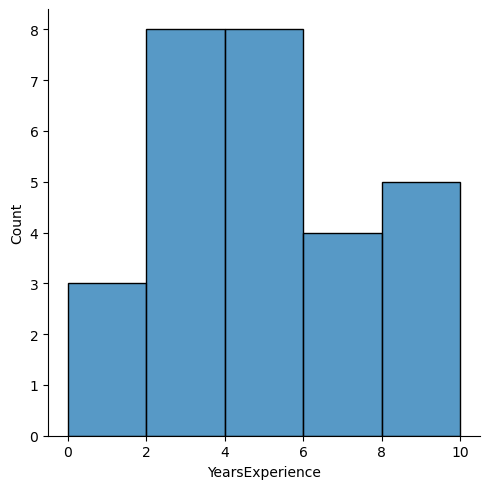

In [5]:
#Create a simple displot
#sns.displot(df['YearsExperience'], kde=False, bins=10)

#Note - look at how the bins parameter is used here. Bins = 10 means use 10 means
  #Comment out the code above, and uncomment thsis code and run the cell again
sns.displot(df['YearsExperience'], kde=False, bins=[0,2,4,6,8,10])

plt.show()

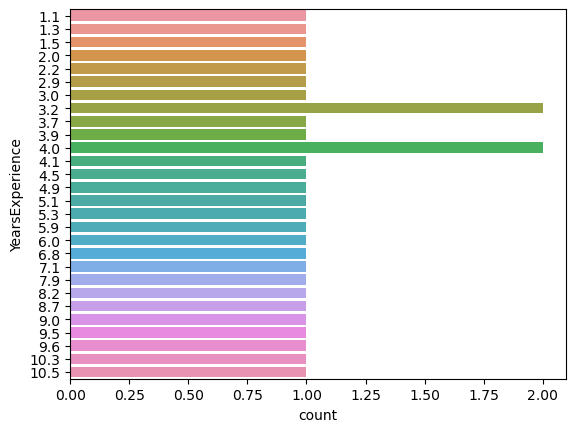

In [6]:
#Create a simple countplot
sns.countplot(y='YearsExperience', data=df)

plt.show()

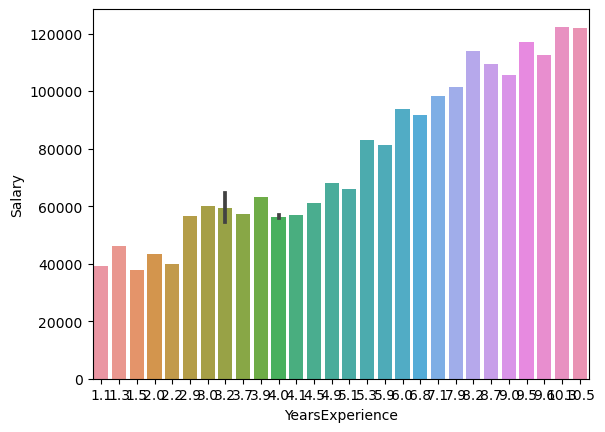

In [7]:
#Create a simple bar chart
sns.barplot(x='YearsExperience', y='Salary', data=df)
plt.show()

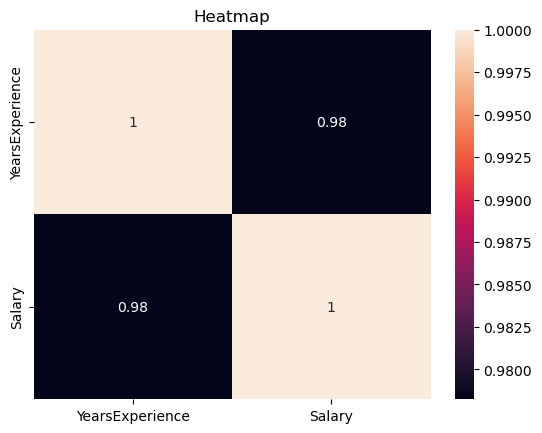

In [8]:
#Create a heatmap - notice how the df.corr() function is called in the code for creating the chart
sns.heatmap(df.corr(), annot=True)

#Add a title
plt.title("Heatmap")

#Show the plot
plt.show()

### Extracting Dependent and Independent Variables

In [9]:
#Assign the relevant columns to X and y - this is another way of doing what we did previously 
  #Notice how uppercase X and lowercase y are used again
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [10]:
#Display X 
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
#Display y 
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Splitting the Dataset into Train and Test

In [12]:
#Split the dataframe for training and testing
  #What does test_size 1/3 mean?
  #What does random_state = 0 mean?
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)

### Fitting the Model to the Training Set

In [13]:
#Fit the model to the training data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Predicting the Test Dataset

In [14]:
#Make predictions using the test data
y_pred = lr.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

### Visualising Output

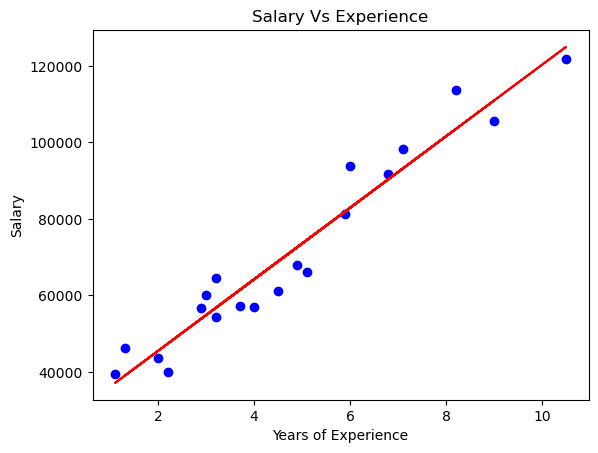

In [15]:
##In this chart - the red line is the line that our model has come up with - it is the best fit model
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Salary Vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Evaluating the model & Finding the Residuals (Errors)

In [16]:
#Mean Absolute Error
print("MAE", metrics.mean_absolute_error(y_test,y_pred))
#Mean Square Error  
print("MSE", metrics.mean_squared_error(y_test,y_pred))
#Route Mean Square Error
print("RMSE", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE 3426.4269374307123
MSE 21026037.329511296
RMSE 58.53568943329114


**What does the RMSE tell us**  
Remember there is no absolute good or bad threshold for the RMSE value, however you can define it based on your Dependent Variable - the variable that you are try to predict. For data which ranges from 0 to 1000, an RMSE of 0.7 is small, but if the range goes from 0 to 1, it is not that small anymore. Look at the values that we are trying to predict here. Is the RMSE value good or poor?

In [17]:
# calculating the  R squared error
r2_score(y_test,y_pred)

0.9749154407708353

**In the results above - the higher the r-squared value is the better**